#Loan Eligibility Prediction using Machine Learning
### Course: Introduction to Machine Learning

## Team Name:
### Name and ID of Member 1: Hillol Pramanik (B2330093)
### Name and ID of Member 2: Manas Mondal (B2330121)

##Importing Libraries and Dataset

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
from sklearn import tree
from scipy import stats
from sklearn.tree import plot_tree
from sklearn.metrics import  accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

data = pd.read_csv("/content/loan_approval_dataset.csv")

##Reading Data Set

In [ ]:
data.head(5)

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [ ]:
data.shape


(4269, 13)

Remove Whitespaces from Column Names

In [ ]:
data.columns = data.columns.str.replace(" ","")
data.columns

Index(['loan_id', 'no_of_dependents', 'education', 'self_employed',
       'income_annum', 'loan_amount', 'loan_term', 'cibil_score',
       'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value', 'loan_status'],
      dtype='object')

### Null Values :

In [ ]:
# Checking for missing values
data.isnull().sum()

,0
loan_id,0
no_of_dependents,0
education,0
self_employed,0
income_annum,0
loan_amount,0
loan_term,0
cibil_score,0
residential_assets_value,0
commercial_assets_value,0


##Categorical Variable :

###1.  Education

In [ ]:
# Count the Frequency of Each Education Category
data['education'].value_counts()

,count
education,
Graduate,2144
Not Graduate,2125


<ipython-input-196-5973ba12e361>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="education", data= data, palette="deep")


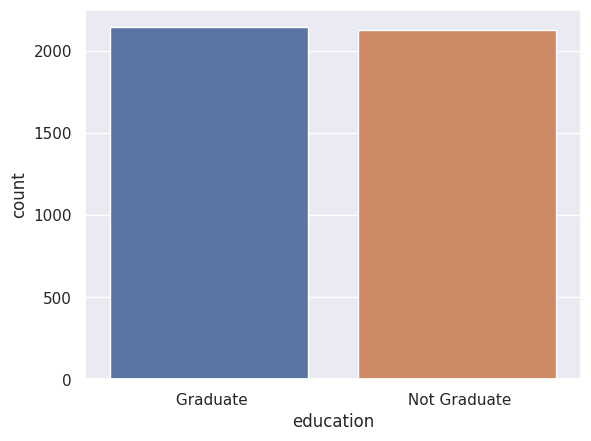

In [ ]:
# Visualize Distribution of Education Categories with Countplot
sns.countplot(x="education", data= data, palette="deep")
plt.show()


In [ ]:
print(data['education'].unique())

[' Graduate' ' Not Graduate']


In [ ]:
data['education'] = data['education'].replace({" Not Graduate": 0, " Graduate": 1})
data['education'].head()

<ipython-input-198-ce3ff2ecdc69>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['education'] = data['education'].replace({" Not Graduate": 0, " Graduate": 1})


,education
0,1
1,0
2,1
3,1
4,0


In [ ]:
# Count the Number of Missing Values in Education Column
countNull_edu = len(data[data.education.isnull()])
countNull_edu

0

###2. Self_Employed

In [ ]:
# Count the Frequency of Each Self_Employed Category
data.self_employed.value_counts()

,count
self_employed,
Yes,2150
No,2119


<ipython-input-201-053b7f12503b>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="self_employed", data= data, palette="deep")


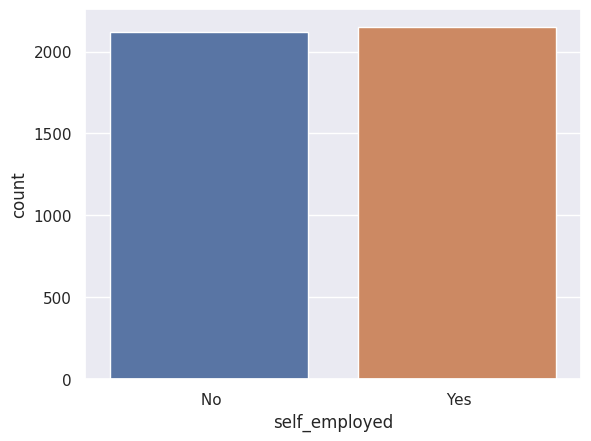

In [ ]:
# Visualize Distribution of Self_Employed Categories with Countplot
sns.countplot(x="self_employed", data= data, palette="deep")
plt.show()

In [ ]:
print(data['self_employed'].unique())

[' No' ' Yes']


In [ ]:
data['self_employed'] = data['self_employed'].replace({" No": 0, " Yes": 1})
data['self_employed'].head()

<ipython-input-203-71e91c1e29bf>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['self_employed'] = data['self_employed'].replace({" No": 0, " Yes": 1})


,self_employed
0,0
1,1
2,0
3,0
4,1


In [ ]:
## Count the Number of Missing Values in Self_Employed Column
countNull_emp = len(data[data.self_employed.isnull()])
countNull_emp

0

### 3. Loan_Status

In [ ]:
# Count the Frequency of Each Loan_Status Category
data.loan_status.value_counts()

,count
loan_status,
Approved,2656
Rejected,1613


<ipython-input-206-dbbc085d68fb>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="loan_status", data= data, palette="deep")


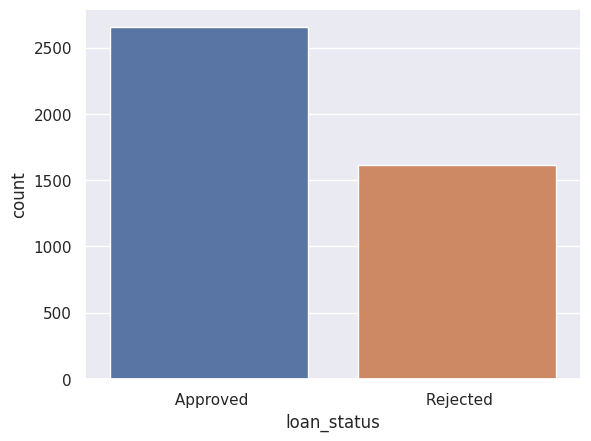

In [ ]:
# Visualize Distribution of Loan_Status Categories with Countplot
sns.countplot(x="loan_status", data= data, palette="deep")
plt.show()

In [ ]:
print(data['loan_status'].unique())

[' Approved' ' Rejected']


In [ ]:
data['loan_status'] = data['loan_status'].replace({" Approved": 1, " Rejected": 0})
data['loan_status'].head()

<ipython-input-208-f78417e76e8a>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['loan_status'] = data['loan_status'].replace({" Approved": 1, " Rejected": 0})


,loan_status
0,1
1,0
2,0
3,0
4,0


In [ ]:
## Count the Number of Missing Values in Loan_Status Column
countNull_ls = len(data[data.loan_status.isnull()])
countNull_ls

0

##Numerical Variable :

###1. Describe Numerical Variable

In [ ]:
data[['no_of_dependents', 'income_annum', 'loan_amount', 'loan_term', 'cibil_score',
       'residential_assets_value', 'commercial_assets_value','luxury_assets_value', 'bank_asset_value']].describe()

,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03
mean,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06
std,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06
min,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00
25%,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06
50%,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06
75%,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06
max,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07


###2. *Histogram* Distribution of Numerical Variable

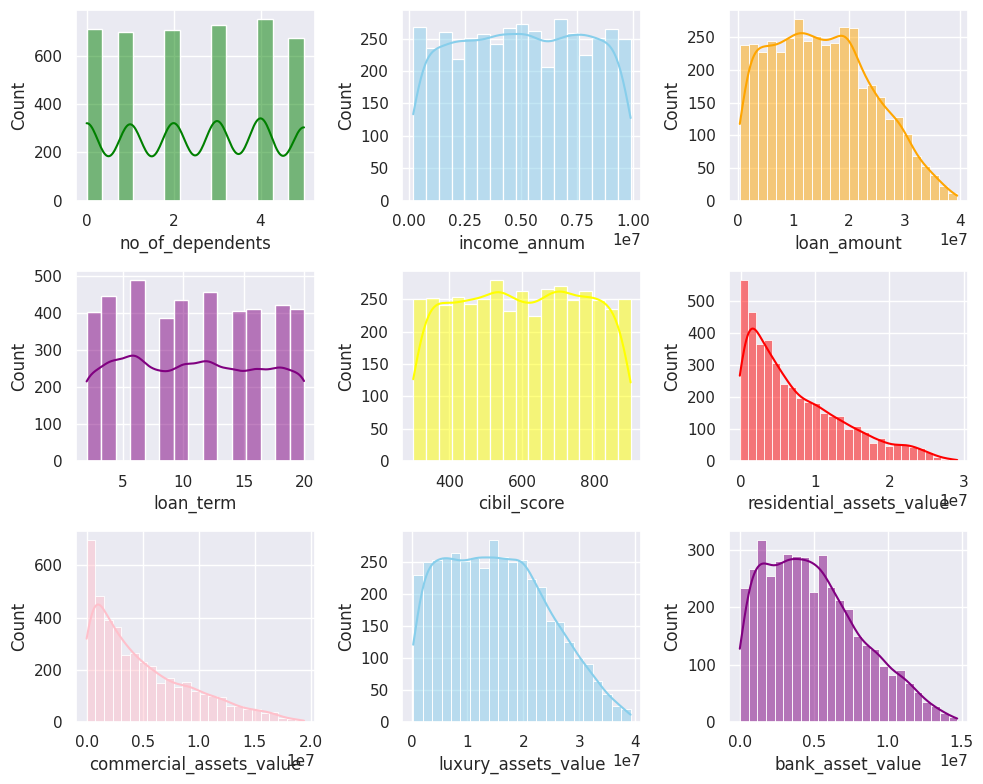

In [ ]:
sns.set(style="darkgrid")
fig, axs = plt.subplots(3, 3, figsize=(10, 8))

sns.histplot(data=data, x="no_of_dependents", kde=True, ax=axs[0, 0], color='green')
sns.histplot(data=data, x="income_annum", kde=True, ax=axs[0, 1], color='skyblue')
sns.histplot(data=data, x="loan_amount", kde=True, ax=axs[0, 2], color='orange')
sns.histplot(data=data, x="loan_term", kde=True, ax=axs[1, 0], color='purple')
sns.histplot(data=data, x="cibil_score", kde=True, ax=axs[1, 1], color='yellow')
sns.histplot(data=data, x="residential_assets_value", kde=True, ax=axs[1, 2], color='red')
sns.histplot(data=data, x="commercial_assets_value", kde=True, ax=axs[2, 0], color='pink')
sns.histplot(data=data, x="luxury_assets_value", kde=True, ax=axs[2, 1], color='skyblue')
sns.histplot(data=data, x="bank_asset_value", kde=True, ax=axs[2, 2], color='purple')


plt.tight_layout()
plt.show()

##Visulize Pairwise Relationships

##  Heatmap

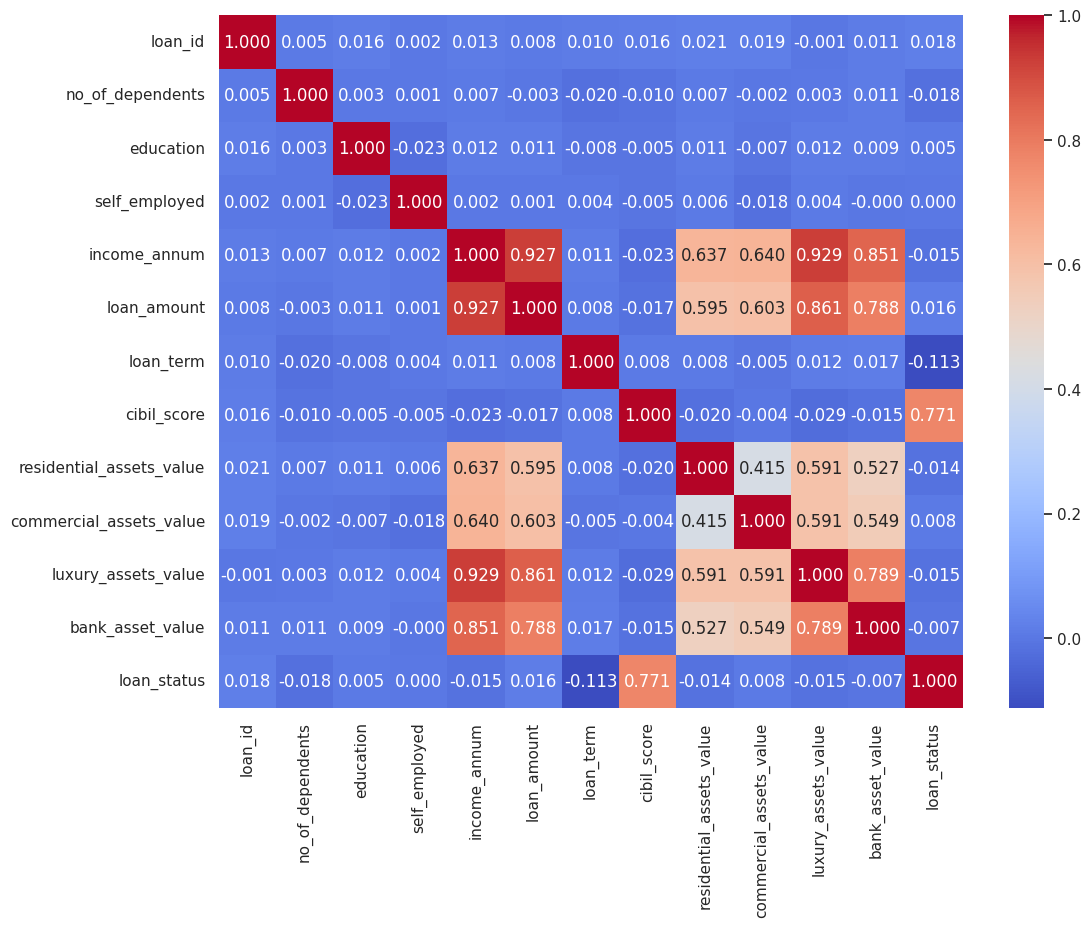

In [ ]:
plt.figure(figsize=(12,9))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.3f')
plt.show()

###Duplicated Values :

In [ ]:
# Checking for duplicated values
data.duplicated().sum()

0

## Data Preprocessing

###1.  Drop Unecessary Variables

In [ ]:
# Dropping Loan_ID column
data = data.drop(columns=['loan_id'])


###2. Remove Outliers & Infinite values

In [ ]:
# Check for infinite values
print(np.isinf(data).sum())

no_of_dependents            0
education                   0
self_employed               0
income_annum                0
loan_amount                 0
loan_term                   0
cibil_score                 0
residential_assets_value    0
commercial_assets_value     0
luxury_assets_value         0
bank_asset_value            0
loan_status                 0
dtype: int64


In [ ]:

# Calculate Z-scores
z_scores = np.abs(stats.zscore(data[['no_of_dependents', 'income_annum', 'loan_amount', 'loan_term', 'cibil_score',
       'residential_assets_value', 'commercial_assets_value','luxury_assets_value', 'bank_asset_value']]))

# Identify outliers where Z-score > 3
outliers = (z_scores > 3)

# Remove outliers
filtered_data_z = data[~outliers.any(axis=1)]
print(filtered_data_z)

      no_of_dependents  education  self_employed  income_annum  loan_amount  \
0                    2          1              0       9600000     29900000   
1                    0          0              1       4100000     12200000   
2                    3          1              0       9100000     29700000   
3                    3          1              0       8200000     30700000   
4                    5          0              1       9800000     24200000   
...                ...        ...            ...           ...          ...   
4264                 5          1              1       1000000      2300000   
4265                 0          0              1       3300000     11300000   
4266                 2          0              0       6500000     23900000   
4267                 1          0              0       4100000     12800000   
4268                 1          1              0       9200000     29700000   

      loan_term  cibil_score  residential_assets_va

##Splitting Dataset

In [ ]:
X = data.drop(['loan_status'],axis=1)
y = data['loan_status']
print(X.shape,y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)


X_train.shape, X_test.shape, y_train.shape, y_test.shape



(4269, 11) (4269,)


((2988, 11), (1281, 11), (2988,), (1281,))

##Model Training and Evaluation

#### Data Normalization

In [ ]:
scalling = MinMaxScaler()
X_train_normalize = scalling.fit_transform(X_train)
X_test_normalize = scalling.transform(X_test)

###1. Logistic Regression

In [ ]:
# Define the hyperparameters grid to search
param_grid_lr = {
    'C': [0.01, 0.1, 1, 10, 100],            # Regularization strength
    'penalty': ['l1', 'l2'],                 # Type of regularization
    'solver': ['liblinear', 'saga'],         # Optimization algorithms
}
start_time_LR = time.time()
# Initialize GridSearchCV with cross-validation (CV=5 means 5-fold cross-validation)
grid_search_lr = GridSearchCV(estimator=LogisticRegression(), param_grid=param_grid_lr, cv=5, n_jobs=-1, verbose=1)

# Fit the grid search to the training data
grid_search_lr.fit(X_train_normalize, y_train)

# Best hyperparameters found by GridSearchCV
print(f"Best Hyperparameters: {grid_search_lr.best_params_}")

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Hyperparameters: {'C': 0.1, 'penalty': 'l1', 'solver': 'saga'}


In [ ]:
LRclassifier = LogisticRegression(C = grid_search_lr.best_params_['C'],
                penalty = grid_search_lr.best_params_['penalty'], solver = grid_search_lr.best_params_['solver'])
LRclassifier.fit(X_train_normalize, y_train)
end_time_LR = time.time()
train_time_LR = end_time_LR - start_time_LR

In [ ]:

y_pred_train = LRclassifier.predict(X_train_normalize)

y_pred_lr = LRclassifier.predict(X_test_normalize)

print(classification_report(y_test, y_pred_lr))
print( 'Confusion Matrix :')
CM_LR = confusion_matrix(y_test, y_pred_lr)
print(CM_LR)

print('Training Time(Second) :' ,train_time_LR)

LRAcc = accuracy_score(y_pred_lr,y_test)
print('LR accuracy: {:.2f}%'.format(LRAcc*100))

precision_LR = precision_score(y_test, y_pred_lr)
print(f"Precision: {precision_LR:.4f}")

recall_LR = recall_score(y_test, y_pred_lr)
print(f"Recall: {recall_LR:.4f}")

f1_LR = f1_score(y_test, y_pred_lr)
print(f"F1-Score: {f1_LR:.4f}")

              precision    recall  f1-score   support

           0       0.88      0.92      0.90       483
           1       0.95      0.92      0.94       798

    accuracy                           0.92      1281
   macro avg       0.92      0.92      0.92      1281
weighted avg       0.92      0.92      0.92      1281

Confusion Matrix :
[[444  39]
 [ 60 738]]
Training Time(Second) : 8.9941565990448
LR accuracy: 92.27%
Precision: 0.9498
Recall: 0.9248
F1-Score: 0.9371


###2.  K-Nearest Neighbour (KNN)

In [ ]:
#splitting data
X_val_knn, X_test_knn, y_val_knn, y_test_knn = train_test_split(X_test, y_test, test_size=0.5, random_state=1)
X_train.shape, X_val_knn.shape, X_test_knn.shape, y_train.shape, y_val_knn.shape, y_test_knn.shape


((2988, 11), (640, 11), (641, 11), (2988,), (640,), (641,))

In [ ]:
X_test_normalize_knn = scalling.transform(X_test_knn)
X_val_normalize_knn = scalling.transform(X_val_knn)

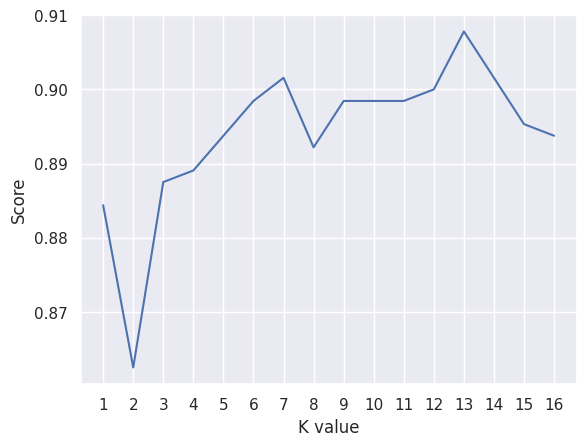

In [ ]:
scoreListknn = []
start_time_KNN = time.time()
for i in range(1,17):
    KNclassifier = KNeighborsClassifier(n_neighbors = i)
    KNclassifier.fit(X_train_normalize, y_train)
    scoreListknn.append(KNclassifier.score(X_val_normalize_knn, y_val_knn))
end_time_KNN = time.time()
train_time_KNN = end_time_KNN - start_time_KNN

plt.plot(range(1,17), scoreListknn)
plt.xticks(np.arange(1,17,1))
plt.xlabel("K value")
plt.ylabel("Score")
plt.show()


In [ ]:

y_pred_knn = KNclassifier.predict(X_test_normalize_knn)
KNAcc = accuracy_score(y_pred_knn,y_test_knn)
print( 'Confusion Matrix :')
CM_KNN = confusion_matrix(y_test_knn, y_pred_knn)
print(CM_KNN)
print("KNN best accuracy: {:.2f}%".format(KNAcc*100))
precision_KNN = precision_score(y_test_knn, y_pred_knn)
print(f"Precision: {precision_KNN:.4f}")

recall_KNN = recall_score(y_test_knn, y_pred_knn)
print(f"Recall: {recall_KNN:.4f}")

f1_KNN = f1_score(y_test_knn, y_pred_knn)
print(f"F1-Score: {f1_KNN:.4f}")
print('Training Time(Second) :' ,train_time_KNN)


Confusion Matrix :
[[211  18]
 [ 37 375]]
KNN best accuracy: 91.42%
Precision: 0.9542
Recall: 0.9102
F1-Score: 0.9317
Training Time(Second) : 2.4069809913635254


### 3. Support Vector Machine (SVM)

In [ ]:
start_time_SVM = time.time()
# Define the SVM model
svm = SVC()

# Define the hyperparameters grid
param_grid_svm = {
    'C': [0.1, 1, 10, 100],                  # Regularization parameter
    'kernel': ['linear', 'rbf', 'poly'],     # Kernel type
    'degree': [3, 4, 5],                     # Degree of the polynomial kernel function (for 'poly')
    'coef0': [0, 1],                         # Independent term in kernel function (for 'poly' and 'sigmoid')
}

# Initialize GridSearchCV with 5-fold cross-validation
grid_search_svm = GridSearchCV(estimator=svm, param_grid=param_grid_svm, cv=5, n_jobs=-1, verbose=1)

# Fit GridSearchCV to the training data
grid_search_svm.fit(X_train_normalize, y_train)

# Best hyperparameters found by GridSearchCV
print(f"Best Hyperparameters: {grid_search_svm.best_params_}")

# Best SVM model
SVCclassifier = grid_search_svm.best_estimator_

end_time_SVM = time.time()

train_time_SVM = end_time_SVM - start_time_SVM

y_pred_svm = SVCclassifier.predict(X_test_normalize)

print(classification_report(y_test, y_pred_svm))
print( 'Confusion Matrix :')
CM_SVM = confusion_matrix(y_test, y_pred_svm)
print(CM_SVM)
precision_SVM = precision_score(y_test, y_pred_svm)
print(f"Precision: {precision_SVM:.4f}")

recall_SVM = recall_score(y_test, y_pred_svm)
print(f"Recall: {recall_SVM:.4f}")

f1_SVM = f1_score(y_test, y_pred_svm)
print(f"F1-Score: {f1_SVM:.4f}")


SVCAcc = accuracy_score(y_pred_svm,y_test)
print('SVC accuracy: {:.2f}%'.format(SVCAcc*100))
print('Training Time(Second) :' ,train_time_SVM)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best Hyperparameters: {'C': 10, 'coef0': 1, 'degree': 3, 'kernel': 'poly'}
              precision    recall  f1-score   support

           0       0.92      0.94      0.93       483
           1       0.97      0.95      0.96       798

    accuracy                           0.95      1281
   macro avg       0.94      0.95      0.94      1281
weighted avg       0.95      0.95      0.95      1281

Confusion Matrix :
[[456  27]
 [ 41 757]]
Precision: 0.9656
Recall: 0.9486
F1-Score: 0.9570
SVC accuracy: 94.69%
Training Time(Second) : 146.9193570613861


###4.  Decision Tree

In [ ]:
#splitting data
X_val_dt, X_test_dt, y_val_dt, y_test_dt = train_test_split(X_test, y_test, test_size=0.5, random_state=1)
X_train.shape, X_val_dt.shape, X_test_dt.shape, y_train.shape, y_val_dt.shape, y_test_dt.shape

((2988, 11), (640, 11), (641, 11), (2988,), (640,), (641,))

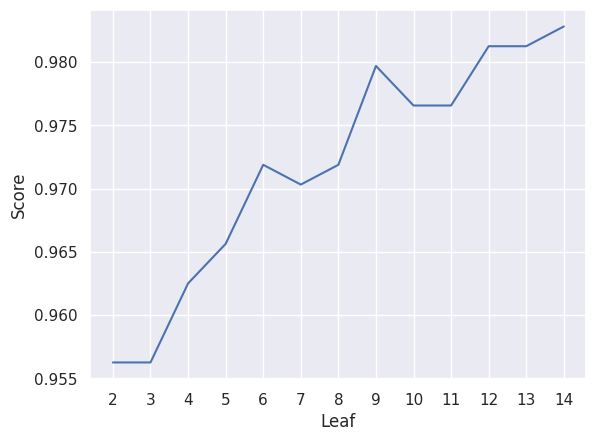

In [ ]:
scoreListDT = []

start_time_DT = time.time()
for i in range(2,15):
    DTclassifier = DecisionTreeClassifier(max_leaf_nodes=i)
    DTclassifier.fit(X_train, y_train)
    scoreListDT.append(DTclassifier.score(X_val_dt, y_val_dt))
end_time_DT = time.time()
train_time_DT = end_time_DT - start_time_DT

plt.plot(range(2,15), scoreListDT)
plt.xticks(np.arange(2,15,1))
plt.xlabel("Leaf")
plt.ylabel("Score")
plt.show()


In [ ]:

y_pred_dt = DTclassifier.predict(X_test_dt)
DTAcc = accuracy_score(y_pred_dt,y_test_dt)
CM_DT = confusion_matrix(y_test_dt, y_pred_dt)
print( 'Confusion Matrix :')
print(CM_DT)
precision_DT = precision_score(y_test_dt, y_pred_dt)
print(f"Precision: {precision_DT:.4f}")

recall_DT = recall_score(y_test_dt, y_pred_dt)
print(f"Recall: {recall_DT:.4f}")

f1_DT = f1_score(y_test_dt, y_pred_dt)
print(f"F1-Score: {f1_DT:.4f}")
print("Decision Tree Accuracy: {:.2f}%".format(DTAcc*100))
print('Training Time(Second) :' ,train_time_DT)

Confusion Matrix :
[[222   7]
 [  1 411]]
Precision: 0.9833
Recall: 0.9976
F1-Score: 0.9904
Decision Tree Accuracy: 98.75%
Training Time(Second) : 0.32390332221984863


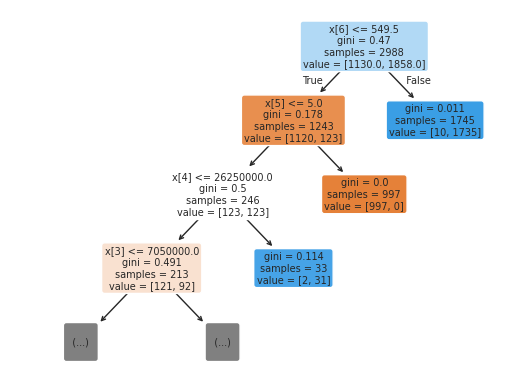

In [ ]:
# Plot Tree
tree.plot_tree(DTclassifier, max_depth=3, filled=True, fontsize=7, rounded=True)
plt.show()

###5.  Random Forest

In [ ]:
#splitting data
X_val_rf, X_test_rf, y_val_rf, y_test_rf = train_test_split(X_test, y_test, test_size=0.5, random_state=1)
X_train.shape, X_val_rf.shape, X_test_rf.shape, y_train.shape, y_val_rf.shape, y_test_rf.shape

((2988, 11), (640, 11), (641, 11), (2988,), (640,), (641,))

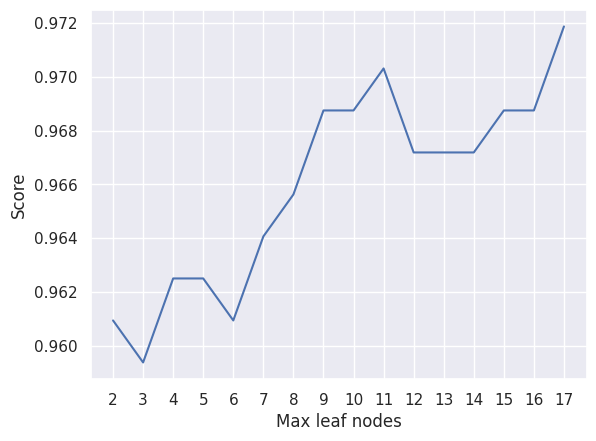

In [ ]:
scoreListRF = []
start_time_RF = time.time()
for i in range(2,18):
    RFclassifier = RandomForestClassifier(n_estimators = 1000, random_state = 1, max_leaf_nodes=i)
    RFclassifier.fit(X_train, y_train)
    scoreListRF.append(RFclassifier.score(X_val_rf, y_val_rf))
end_time_RF = time.time()
train_time_RF = end_time_RF - start_time_RF

plt.plot(range(2,18), scoreListRF)
plt.xticks(np.arange(2,18,1))
plt.xlabel("Max leaf nodes")
plt.ylabel("Score")
plt.show()


In [ ]:
y_pred_rf = RFclassifier.predict(X_test_rf)
RFAcc = accuracy_score(y_pred_rf,y_test_rf)
CM_RF = confusion_matrix(y_test_rf, y_pred_rf)
print( 'Confusion Matrix :')
print(CM_RF)
precision_RF = precision_score(y_test_rf, y_pred_rf)
print(f"Precision: {precision_RF:.4f}")

recall_RF = recall_score(y_test_rf, y_pred_rf)
print(f"Recall: {recall_RF:.4f}")

f1_RF = f1_score(y_test_rf, y_pred_rf)
print(f"F1-Score: {f1_RF:.4f}")
print("Random Forest Accuracy:  {:.2f}%".format(RFAcc*100))
print('Training Time(Second) :' ,train_time_RF)

Confusion Matrix :
[[225   4]
 [ 11 401]]
Precision: 0.9901
Recall: 0.9733
F1-Score: 0.9816
Random Forest Accuracy:  97.66%
Training Time(Second) : 66.8853816986084


###6.   Gradient Boosting

In [ ]:
start_time_GB = time.time()
# Define the Gradient Boosting model
gb = GradientBoostingClassifier()

# Define the hyperparameter distribution for RandomizedSearchCV
param_dist_gb = {
    'n_estimators': np.arange(50, 201, 50),          # Number of boosting stages
    'max_depth': [3, 4, 5, 6],                        # Max depth of trees
    'min_samples_leaf': [1, 2, 4],                     # Min samples at a leaf node
    'subsample': [0.8, 0.9, 1.0],                      # Fraction of samples used for each tree
}

# Initialize RandomizedSearchCV with 5-fold cross-validation and 100 iterations of random sampling
random_search_gb = RandomizedSearchCV(estimator=gb, param_distributions=param_dist_gb,
                                   n_iter=100, cv=5, verbose=1, random_state=42, n_jobs=-1)

# Fit RandomizedSearchCV to the training data
random_search_gb.fit(X_train, y_train)

# Best hyperparameters found by RandomizedSearchCV
print(f"Best Hyperparameters: {random_search_gb.best_params_}")

# Best Gradient Boosting model
GBclassifier = random_search_gb.best_estimator_

end_time_GB = time.time()
train_time_GB = end_time_GB - start_time_GB

# Evaluate on the test set
y_pred_gb= GBclassifier.predict(X_test)

CM_GB = confusion_matrix(y_test, y_pred_gb)
print( 'Confusion Matrix :')
print(CM_GB)
precision_GB = precision_score(y_test, y_pred_gb)
print(f"Precision: {precision_GB:.4f}")

recall_GB = recall_score(y_test, y_pred_gb)
print(f"Recall: {recall_GB:.4f}")

f1_GB = f1_score(y_test, y_pred_gb)
print(f"F1-Score: {f1_GB:.4f}")

GBAcc = accuracy_score(y_pred_gb,y_test)
print('Gradient Boosting accuracy: {:.2f}%'.format(GBAcc*100))
print('Training Time(Second) :' ,train_time_GB)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best Hyperparameters: {'subsample': 1.0, 'n_estimators': 50, 'min_samples_leaf': 2, 'max_depth': 6}
Confusion Matrix :
[[471  12]
 [  7 791]]
Precision: 0.9851
Recall: 0.9912
F1-Score: 0.9881
Gradient Boosting accuracy: 98.52%
Training Time(Second) : 419.63667821884155


## Model Comparison

In [ ]:
compare = pd.DataFrame({'Model': ['Logistic Regression', 'KNN', 'SVM', 'Decision Tree', 'Random Forest', 'Gradient Boosting'],
                        'Accuracy': [LRAcc*100, KNAcc*100, SVCAcc*100, DTAcc*100, RFAcc*100, GBAcc*100],
                        'Time': [train_time_LR, train_time_KNN, train_time_SVM, train_time_DT, train_time_RF, train_time_GB ],
                        'CM': [CM_LR, CM_KNN, CM_SVM, CM_DT, CM_RF, CM_GB],
                       'Precision':[precision_LR, precision_KNN, precision_SVM, precision_DT, precision_RF, precision_GB],
                        'Recall': [recall_LR, recall_KNN, recall_SVM, recall_DT, recall_RF, recall_GB],
                       'F1_Score': [f1_LR, f1_KNN, f1_SVM, f1_DT, f1_RF, f1_GB] })

In [ ]:

short_by_acc = compare.sort_values(by='Accuracy', ascending=False)
print(short_by_acc)


                 Model   Accuracy        Time                      CM  \
3        Decision Tree  98.751950    0.323903    [[222, 7], [1, 411]]   
5    Gradient Boosting  98.516784  419.636678   [[471, 12], [7, 791]]   
4        Random Forest  97.659906   66.885382   [[225, 4], [11, 401]]   
2                  SVM  94.691647  146.919357  [[456, 27], [41, 757]]   
0  Logistic Regression  92.271663    8.994157  [[444, 39], [60, 738]]   
1                  KNN  91.419657    2.406981  [[211, 18], [37, 375]]   

   Precision    Recall  F1_Score  
3   0.983254  0.997573  0.990361  
5   0.985056  0.991228  0.988132  
4   0.990123  0.973301  0.981640  
2   0.965561  0.948622  0.957016  
0   0.949807  0.924812  0.937143  
1   0.954198  0.910194  0.931677  


In [ ]:
short_by_Precision = compare.sort_values(by='Precision', ascending=False)
print(short_by_Precision)

                 Model   Accuracy        Time                      CM  \
4        Random Forest  97.659906   66.885382   [[225, 4], [11, 401]]   
5    Gradient Boosting  98.516784  419.636678   [[471, 12], [7, 791]]   
3        Decision Tree  98.751950    0.323903    [[222, 7], [1, 411]]   
2                  SVM  94.691647  146.919357  [[456, 27], [41, 757]]   
1                  KNN  91.419657    2.406981  [[211, 18], [37, 375]]   
0  Logistic Regression  92.271663    8.994157  [[444, 39], [60, 738]]   

   Precision    Recall  F1_Score  
4   0.990123  0.973301  0.981640  
5   0.985056  0.991228  0.988132  
3   0.983254  0.997573  0.990361  
2   0.965561  0.948622  0.957016  
1   0.954198  0.910194  0.931677  
0   0.949807  0.924812  0.937143  


In [ ]:
short_by_Recall = compare.sort_values(by='Recall', ascending=False)
print(short_by_Recall)

                 Model   Accuracy        Time                      CM  \
3        Decision Tree  98.751950    0.323903    [[222, 7], [1, 411]]   
5    Gradient Boosting  98.516784  419.636678   [[471, 12], [7, 791]]   
4        Random Forest  97.659906   66.885382   [[225, 4], [11, 401]]   
2                  SVM  94.691647  146.919357  [[456, 27], [41, 757]]   
0  Logistic Regression  92.271663    8.994157  [[444, 39], [60, 738]]   
1                  KNN  91.419657    2.406981  [[211, 18], [37, 375]]   

   Precision    Recall  F1_Score  
3   0.983254  0.997573  0.990361  
5   0.985056  0.991228  0.988132  
4   0.990123  0.973301  0.981640  
2   0.965561  0.948622  0.957016  
0   0.949807  0.924812  0.937143  
1   0.954198  0.910194  0.931677  


In [ ]:
short_by_F1_Score = compare.sort_values(by='F1_Score', ascending=False)
print(short_by_F1_Score)

                 Model   Accuracy        Time                      CM  \
3        Decision Tree  98.751950    0.323903    [[222, 7], [1, 411]]   
5    Gradient Boosting  98.516784  419.636678   [[471, 12], [7, 791]]   
4        Random Forest  97.659906   66.885382   [[225, 4], [11, 401]]   
2                  SVM  94.691647  146.919357  [[456, 27], [41, 757]]   
0  Logistic Regression  92.271663    8.994157  [[444, 39], [60, 738]]   
1                  KNN  91.419657    2.406981  [[211, 18], [37, 375]]   

   Precision    Recall  F1_Score  
3   0.983254  0.997573  0.990361  
5   0.985056  0.991228  0.988132  
4   0.990123  0.973301  0.981640  
2   0.965561  0.948622  0.957016  
0   0.949807  0.924812  0.937143  
1   0.954198  0.910194  0.931677  


In [ ]:
short_by_time = compare.sort_values(by='Time', ascending=False)
print(short_by_time)

                 Model   Accuracy        Time                      CM  \
5    Gradient Boosting  98.516784  419.636678   [[471, 12], [7, 791]]   
2                  SVM  94.691647  146.919357  [[456, 27], [41, 757]]   
4        Random Forest  97.659906   66.885382   [[225, 4], [11, 401]]   
0  Logistic Regression  92.271663    8.994157  [[444, 39], [60, 738]]   
1                  KNN  91.419657    2.406981  [[211, 18], [37, 375]]   
3        Decision Tree  98.751950    0.323903    [[222, 7], [1, 411]]   

   Precision    Recall  F1_Score  
5   0.985056  0.991228  0.988132  
2   0.965561  0.948622  0.957016  
4   0.990123  0.973301  0.981640  
0   0.949807  0.924812  0.937143  
1   0.954198  0.910194  0.931677  
3   0.983254  0.997573  0.990361  


###Plot Performance

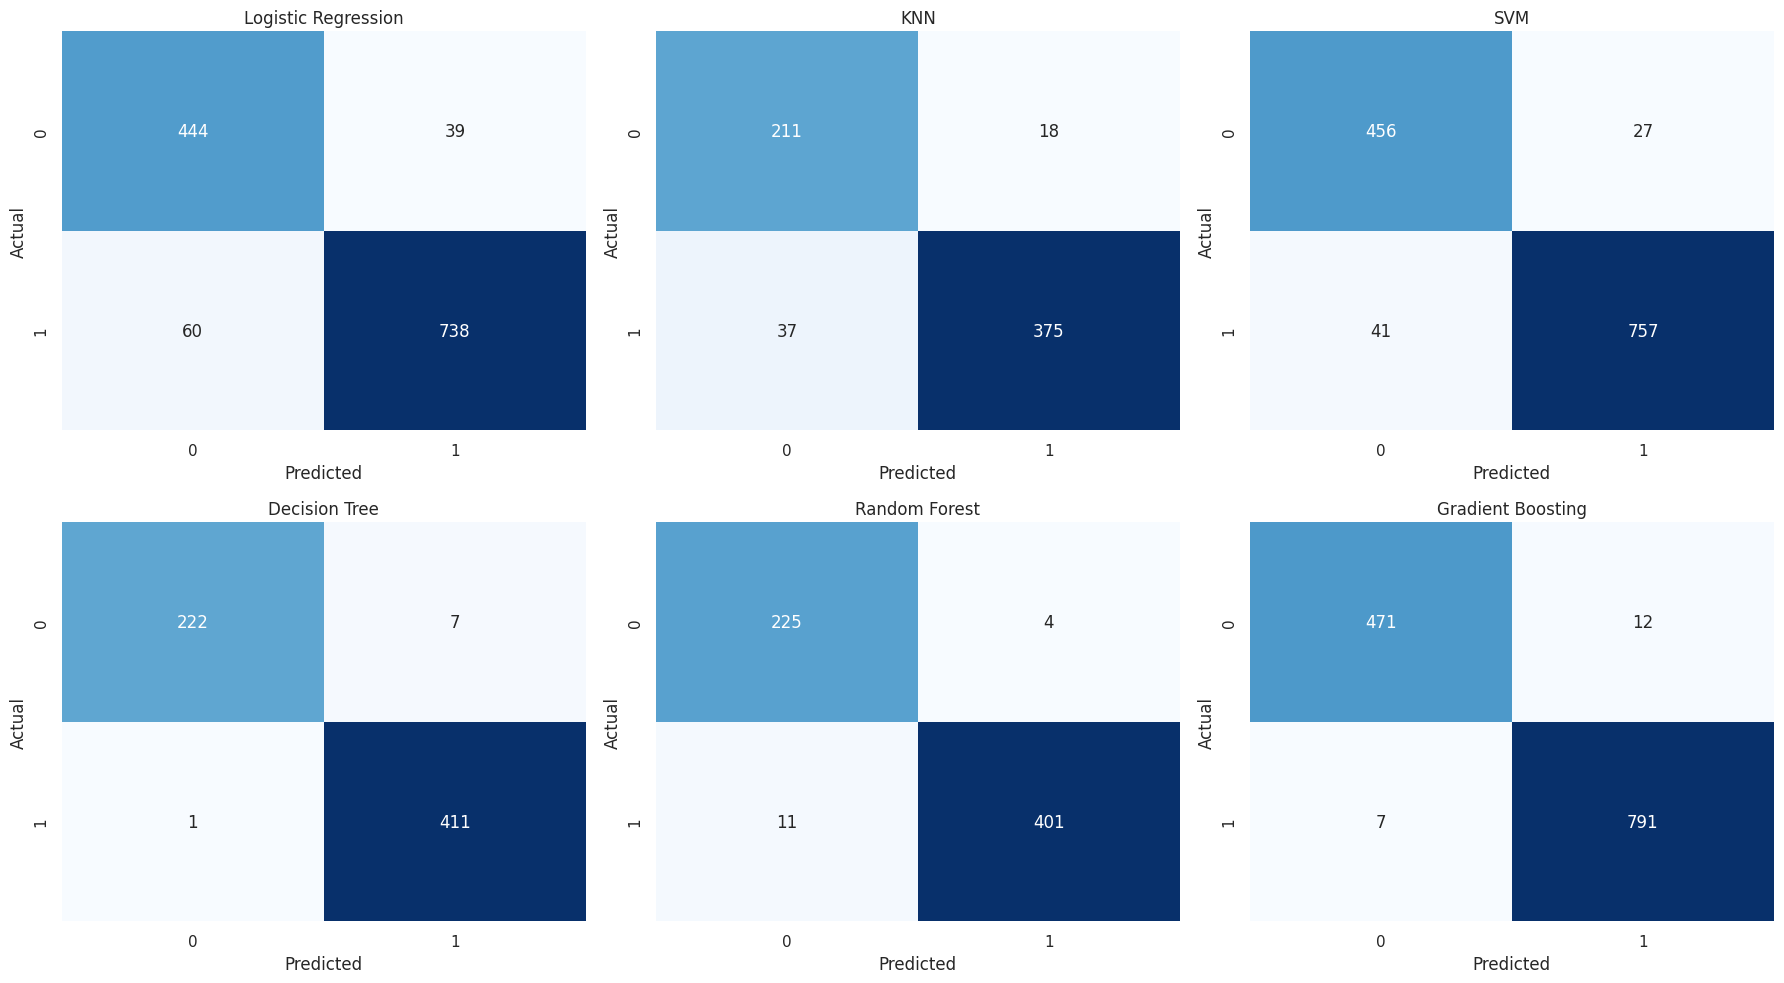

In [ ]:
# Calutating Confusion Matrics

# Create a figure with 6 subplots
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.ravel()

# Plot confusion matrix for each model
for i, ax in enumerate(axes):
    sns.heatmap(compare['CM'][i], annot=True, fmt='d', cmap='Blues', cbar=False, ax=ax)
    ax.set_title(compare['Model'][i])
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')

# Adjust layout
plt.tight_layout()
plt.show()


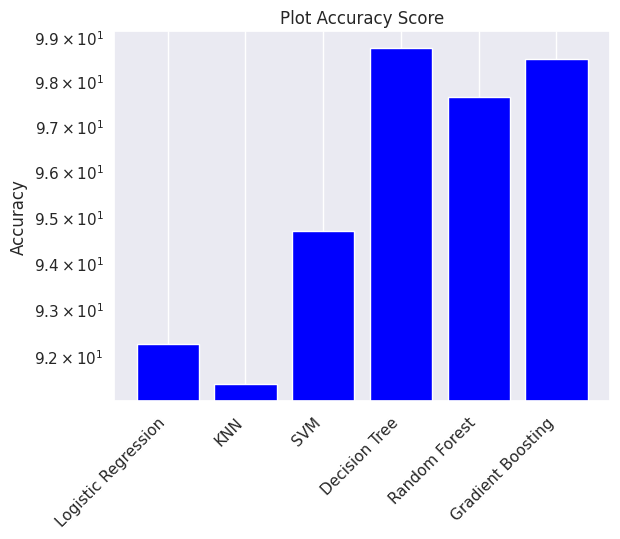

In [ ]:

# Plot Accuracy Score
fig, plot= plt.subplots()
plot.bar(range(len(compare['Model'])), compare['Accuracy'], color='blue')
plot.set_yscale('log')
plot.set_xticks(range(len(compare['Model'])))
plot.set_xticklabels(compare['Model'], rotation=45, ha='right') # Set the xtick labels
plot.set_ylabel('Accuracy')
plot.set_title('Plot Accuracy Score')
plt.show()

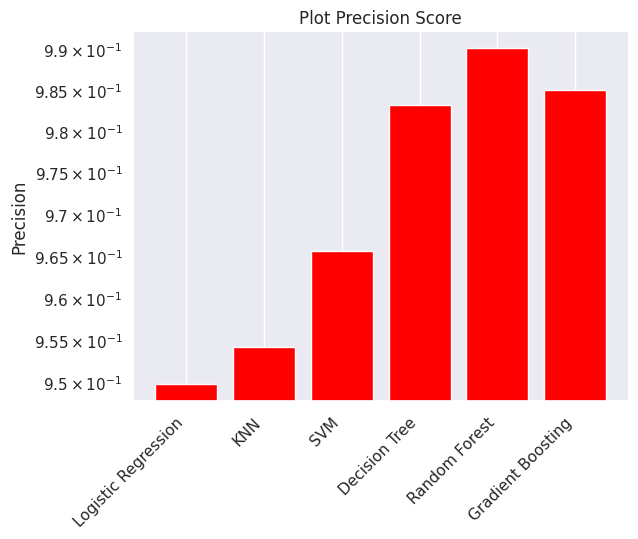

In [ ]:
# Plot Precision Score
fig, plot= plt.subplots()
plot.bar(range(len(compare['Model'])), compare['Precision'], color='red')
plot.set_yscale('log')
plot.set_xticks(range(len(compare['Model'])))
plot.set_xticklabels(compare['Model'], rotation=45, ha='right') # Set the xtick labels
plot.set_ylabel('Precision')
plot.set_title('Plot Precision Score')
plt.show()


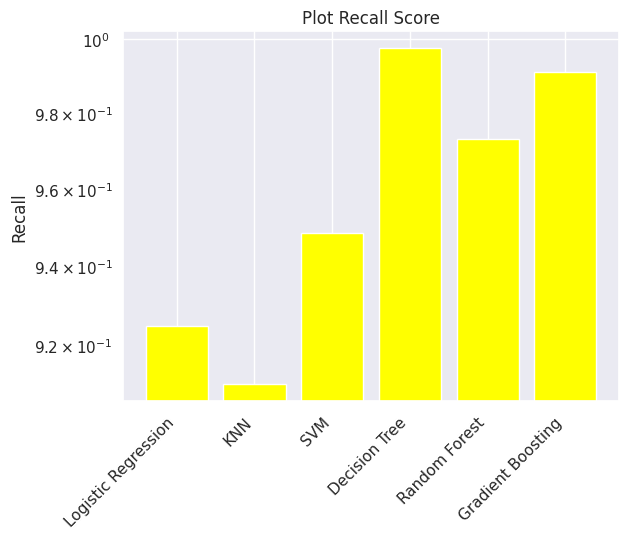

In [ ]:

# Plot Recall Score
fig, plot= plt.subplots()
plot.bar(range(len(compare['Model'])), compare['Recall'], color='yellow')
plot.set_yscale('log')
plot.set_xticks(range(len(compare['Model'])))
plot.set_xticklabels(compare['Model'], rotation=45, ha='right') # Set the xtick labels
plot.set_ylabel('Recall')
plot.set_title('Plot Recall Score')
plt.show()


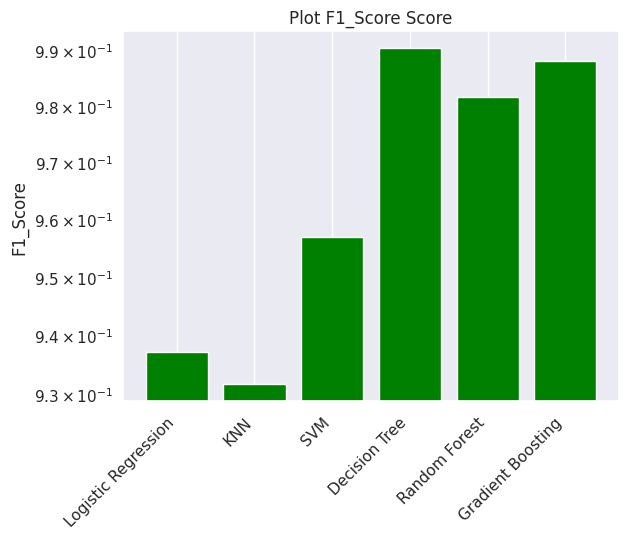

In [ ]:
# Plot F1_Score Score
fig, plot= plt.subplots()
plot.bar(range(len(compare['Model'])), compare['F1_Score'], color='green')
plot.set_yscale('log')
plot.set_xticks(range(len(compare['Model'])))
plot.set_xticklabels(compare['Model'], rotation=45, ha='right') # Set the xtick labels
plot.set_ylabel('F1_Score')
plot.set_title('Plot F1_Score Score')
plt.show()

### Plot Training Time


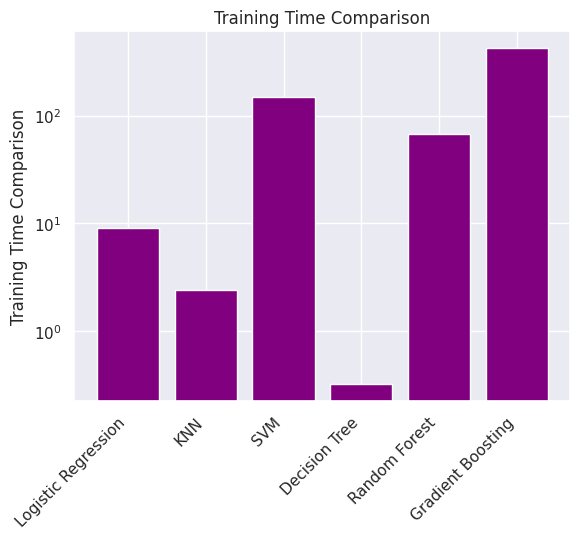

In [ ]:
# Computational Time Plot
fig, plot= plt.subplots()
plot.bar(range(len(compare['Model'])), compare['Time'], color='purple')
plot.set_yscale('log')
plot.set_xticks(range(len(compare['Model'])))
plot.set_xticklabels(compare['Model'], rotation=45, ha='right') # Set the xtick labels
plot.set_ylabel('Training Time Comparison')
plot.set_title('Training Time Comparison')
plt.show()




```

```

##Conclusion :
Based on the performance of different machine learning models, Gradient Boosting and Decision Trees perform the best, with accuracies above 98%. These models show high precision and recall, making them highly reliable for predicting loan approval status. However, Gradient Boosting has a significantly higher training time (over 400 seconds), which could be a limiting factor for real-time applications. Random Forest also performs well with an accuracy of 97% and has a relatively moderate training time. Logistic Regression and KNN yield slightly lower accuracies but are much faster to train, making them more suitable for applications where time is critical. In summary, the choice of model depends not only on accuracy but also on the computational efficiency required for the specific use case. Future work could focus on optimizing training times, possibly through techniques like model pruning or parallelization.
